In [11]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [31]:
# Load pickled data
with open('small_train_traffic.p', mode='rb') as f:
    data = pickle.load(f)

X_train, y_train = data['features'], data['labels']

In [32]:
# Load pickled data
with open('small_test_traffic.p', mode='rb') as f:
    data = pickle.load(f)

X_test, y_test = data['features'], data['labels']

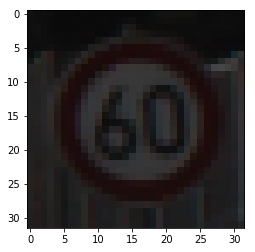

In [33]:
plt.imshow(X_train[25])
plt.show()

In [17]:
# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten

Using TensorFlow backend.


In [18]:
# TODO: Build the Fully Connected Neural Network in Keras Here
model = Sequential()

model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))

In [19]:
# preprocess data
X_normalized = np.array(X_train / 255.0 - 0.5 )

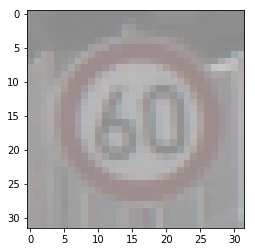

In [21]:
plt.imshow(X_normalized[25])
plt.show()

In [22]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)

In [26]:
y_train[0], y_one_hot[0]

(2, array([0, 1, 0, 0, 0]))

In [27]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [30]:
history = model.fit(X_normalized, y_one_hot, epochs=10, validation_split=0.2)

Train on 80 samples, validate on 20 samples
Epoch 1/10
80/80 [==============================] - 0s - loss: 0.1543 - acc: 1.0000 - val_loss: 0.0897 - val_acc: 1.0000
Epoch 2/10
80/80 [==============================] - 0s - loss: 0.1508 - acc: 1.0000 - val_loss: 0.0824 - val_acc: 1.0000
Epoch 3/10
80/80 [==============================] - 0s - loss: 0.1302 - acc: 1.0000 - val_loss: 0.0746 - val_acc: 1.0000
Epoch 4/10
80/80 [==============================] - 0s - loss: 0.1288 - acc: 0.9875 - val_loss: 0.0696 - val_acc: 1.0000
Epoch 5/10
80/80 [==============================] - 0s - loss: 0.1448 - acc: 0.9875 - val_loss: 0.0590 - val_acc: 1.0000
Epoch 6/10
80/80 [==============================] - 0s - loss: 0.1561 - acc: 0.9375 - val_loss: 0.0596 - val_acc: 1.0000
Epoch 7/10
80/80 [==============================] - 0s - loss: 0.1312 - acc: 0.9750 - val_loss: 0.0864 - val_acc: 1.0000
Epoch 8/10
80/80 [==============================] - 0s - loss: 0.0891 - acc: 1.0000 - val_loss: 0.0880 - val_

In [38]:
X_test_normalized = np.array(X_test / 255.0 - 0.5 )

y_test_one_hot = label_binarizer.fit_transform(y_test)

#evaluate
score = model.evaluate(X_test_normalized, y_test_one_hot, batch_size=128)

20/20 [==============================] - 0s


In [39]:
model.metrics_names, score

(['loss', 'acc'], [0.18172204494476318, 1.0])